# ***Title***: Project 4 - *Artificial Neural Network for Email Spam data*
## ***Author***: Ian R. Stewart
## ***Course***: COSC528 : Fall 2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random # Using to randomize initial weights

> #### **IMPORTING DATA**

In [2]:
inPath = '/Users/i6o/Research/COSC 528/Project 4/'
inPath = './'
outPath = inPath+'Figures/'
features = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam class']
df = pd.read_csv(inPath+'spambase.data',names=features)

In [3]:
df.head(1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam class
0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.756,61,278,1


## 1) Data Exploration

In [4]:
print 'dataframe shape:\t(%i,%i)'%(df.shape[0],df.shape[1])
np.round(df.describe(),2)

dataframe shape:	(4601,58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam class
count,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,...,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00
mean,0.10,0.21,0.28,0.07,0.31,0.10,0.11,0.11,0.09,0.24,...,0.04,0.14,0.02,0.27,0.08,0.04,5.19,52.17,283.29,0.39
std,0.31,1.29,0.50,1.40,0.67,0.27,0.39,0.40,0.28,0.64,...,0.24,0.27,0.11,0.82,0.25,0.43,31.73,194.89,606.35,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.59,6.00,35.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.06,0.00,0.00,0.00,0.00,2.28,15.00,95.00,0.00
75%,0.00,0.00,0.42,0.00,0.38,0.00,0.00,0.00,0.00,0.16,...,0.00,0.19,0.00,0.32,0.05,0.00,3.71,43.00,266.00,1.00
max,4.54,14.28,5.10,42.81,10.00,5.88,7.27,11.11,5.26,18.18,...,4.38,9.75,4.08,32.48,6.00,19.83,1102.50,9989.00,15841.00,1.00


> **Checking for empty arrays in matrix.**

In [5]:
# Iterating through df, searching for .isnull().any()
count = 0; indexes = []
for i in df.isnull().any():
    if i == True:
        indexes.append(count)
    count+=1
if len(indexes)>0:
    print 'FEATURES WITH MISSING DATA: %s'%df.columns.values[indexes]
else:
    print 'NO MISSING DATA IN DATAFRAME.'

NO MISSING DATA IN DATAFRAME.


In [6]:
# Checking for negative values in dataset
for i in df:
    [j for j in df[i] if j < 0]

> **NO EMPTY data entries or NEGATIVE values in columns. Now, let's examine the data types for each data feature (column)**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

>**All features are either float64 or int64, which is ideal as an object return would require further investigation into the data feature to track down why Python is reading the column as a non-float or -int.**

> **After initial pruning of the data, I observed an odd behaviour where the majority of the data entries examined (at random) contained a 1.0 spam classification indicating that the email was, in fact, spam. I want to plot the data to look if all the data are in fact spam.**

Text(0.5,0,'Entry Index in Dataframe')

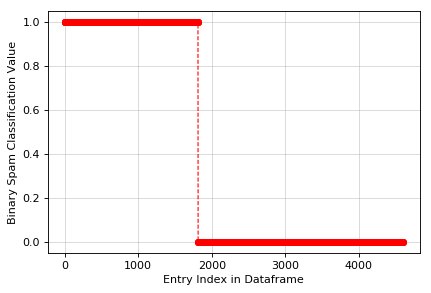

In [8]:
fig,ax = plt.subplots(dpi=80)
ax.plot(df['spam class'].values,'ro--',linewidth=1,markersize=5)
ax.grid(alpha=0.5)
ax.set_ylabel('Binary Spam Classification Value')
ax.set_xlabel('Entry Index in Dataframe')
#plt.savefig(outPath+'Initial_Classification_Investigation.png',dpi=400)

> **My hypothesis failed, where all data entries are assigned to one class (spam or non-spam). Let's count the spam classifications.**

In [9]:
print '[No. of Spam , No. of non-Spam]\t :  [%i , %i]'%(list(df['spam class']).count(0),list(df['spam class']).count(1))

[No. of Spam , No. of non-Spam]	 :  [2788 , 1813]


> **This shows that ~40% (1813/4601) of the data are classified as SPAM with the remaining ~60% (2788/4601) being non-SPAM. Another observation is that the classifications are actually grouped together, where the SPAM classifications are the FIRST 1813 entries and the latter portion of the dataframe are ALL non-SPAM classifications. This is an interesting finding, as a small training-test split for a cross-validation study can potentially cause classification errors if the an sufficient amount of each group is not represented in the training set.**

## 2) Data Analysis

Creating training-test split function for cross-validation study later.

In [10]:
def test_split(data_x,data_y,n):
    '''
    :param data_x : {array} feature data
    :param data_y : {array} classificatin data
    :param n      : {int}   percentage of split in training
    '''
    data_x = np.asarray(data_x)
    length_test = int(round(len(data_x)*(n/100.)))
    # Create random integers between two numbers with no repeats
    train_list = random.sample(range(0,len(data_x)), length_test)
    train_list.sort()
    test_list = np.arange(0,len(data_x))
    test_list = np.delete(test_list,train_list)
    data_y = np.array(data_y)
    x_train,y_train = np.array(data_x[train_list]),np.array(data_y[train_list])
    x_test,y_test   = np.array(data_x[test_list]),np.array(data_y[test_list])
    
    return (x_train,x_test,y_train,y_test,train_list,list(test_list))

In [10]:
class ANN():
    '''
    ANN : artificial neural network
    Description: The general flow of this ANN class is as follows:
            1. Split data into Training and Test set
        On training data, perform:
            2. Initialize weights for given number of hidden layers
            3. Forward propagate and calc output
                a. activiation step
                b. neuron transfer step
                c. forward propagation step
            4. 
    '''
    def __init__(self,n_inputs,n_hidden,n_neurons,n_outputs,activation_func):
        self.n_inputs  = 57
        self.n_hidden  = 1
        self.n_neurons = 5
        self.n_outputs = 2
        self.activation_func = 'sigmoid'
        if (activation_func!='sigmoid')or(activation_func!='linear')or(activation_func!='softmax'):
            print 'CHOOSE CORRECT ACTIVIATION FUNCTION FROM LIST:\n1.\tsigmoid\n2.\tlinear\n3.\tsoftmax'
      
    def test_split(self,data_x,data_y,n):
        '''
        :param data_x : { array } feature data
        :param data_y : { array } classificatin data
        :param n      : { int   } percentage of split in training
        '''
        data_x = np.asarray(data_x)
        length_test = int(round(len(data_x)*(n/100.)))
        # Create random integers between two numbers with no repeats
        train_list = random.sample(range(0,len(data_x)), length_test)
        train_list.sort()
        test_list = np.arange(0,len(data_x))
        test_list = np.delete(test_list,train_list)
        data_y = np.array(data_y)
        x_train,y_train = np.array(data_x[train_list]),np.array(data_y[train_list])
        x_test,y_test   = np.array(data_x[test_list]),np.array(data_y[test_list])
        return (x_train,x_test,y_train,y_test,train_list,list(test_list))

    def initialize(self,number_inputs,number_hidden,number_neurons,number_outputs):
        '''
        Description : Initialize weights for constructed network. Weight values for the 
                        hidden layer weights contain a +1 value to account for the bias 
                        at each layer.
        
        :param number_inputs  : { int } number of inputs in input layer
        :param number_hidden  : { int } number of hidden layers in network
        :param number_neurons : { int } number of neurons in hidden layer
        :param number_outputs : { int } number of outputs in output layer
        '''
        network = []
        for i in range(number_hidden):
            # empty, initialize network
            if i==0:
                hidden_layer = [{'weights':[random.uniform(0, 1) for i in range(number_inputs + 1)]} for i in range(number_neurons)]
                network.append(hidden_layer) 
            # append after initializations
            else:
                hidden_layer = [{'weights':[random.uniform(0, 1) for i in range(number_neurons + 1)]} for i in range(number_neurons)]
                network.append(hidden_layer)
        output_layer = [{'weights':[random.uniform(0, 1) for i in range(number_neurons + 1)]} for i in range(number_outputs)]
        network.append(output_layer)
        return self.network
    
    def activate(self,weights, inputs):
        '''
        activate : neuron activation function calculated
                    by the weighted sum of inputs plus bias.
                    Bias is positioned to final value in the list.
        '''
        activation = weights[-1] # initialize 
        for i in range(len(weights)-1):
            activation += weights[i] * inputs[i]
        return activation

    def transfer_function(self,a):
        if (self.activation_func=='sigmoid') or (self.activation_func=='logistic sigmoid'):
            return (1.0 + np.exp(-a))**-1
        if self.activation_func=='linear':
            return a
        if self.activation_func=='softmax':
            return 1.0 / (1.0 + exp(-a))

    # Forward propagate input to a network output
    def forward(self,network, row):
        inputs = row
        for layer in network:
            new_inputs = []
            for neuron in layer:
                activation = activate(neuron['weights'], inputs)
                neuron['output'] = transfer_function(activation)
                new_inputs.append(neuron['output'])
            inputs = new_inputs
        return inputs
    
    def backward(network,known):
        for i in range(len(network))[::-1]:
            layer = network[i]
            errors = list()
            if i != len(network)-1:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in network[i + 1]:
                        error += (neuron['weights'][j] * neuron['delta'])
                    errors.append(error)
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    errors.append(expected[j] - neuron['output'])
            for j in range(len(layer)):
                neuron = layer[j]
                neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
    
    def main(self,data,split,n_inputs,n_hidden,n_outputs):
        '''
        main : runs ANN with provided network structure
        '''
        
        network = initialize(n_inputs,n_hidden,n_outputs)
    
    

In [13]:


def transfer_function(a):
    return (1.0 + np.exp(-a))**-1

def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [28]:
network = [
        [
        {'weights': [0.7270700037509241, 0.7383627445080684, 0.18978193074880423]}, 
        {'weights': [0.7869285898008361, 0.11191242288793657, 0.6323166547815777]}, 
        {'weights': [0.5542929997136264, 0.6299108552149877, 0.036872224253109986]}
        ],
        [
        {'weights': [0.9541070703271004, 0.9002708967220981, 0.5574211004774138, 0.56239456051497]}, 
        {'weights': [0.5772579431172555, 0.5744375394342741, 0.276212229019259, 0.5615663370673547]}, 
        {'weights': [0.49917371980390934, 0.2289715704548373, 0.9165265896818503, 0.4831653543316994]}
        ],
        [
        {'weights': [0.7936276360327776, 0.9247539681130554, 0.08899479960010304, 0.6728626611317721]}, 
        {'weights': [0.19170994036771682, 0.8864472297353635, 0.1201225021016884, 0.15257603530797048]}
        ]
            ]
forward_propagate(network,[1,1,1])

[0.90638072270967318, 0.76610003734280829]

In [12]:
y_data = np.array(df.iloc[:,-1])
x_data = np.array(df.iloc[:,0:-1])
print 'CHECK: Original data shape of (%i,%i) and splits shapes:\n\tx_data:\t(%i,%i)\n\ty_data:\t(%i,1)'\
    %(df.shape[0],df.shape[1],x_data.shape[0],x_data.shape[1],y_data.shape[0])

CHECK: Original data shape of (4601,58) and splits shapes:
	x_data:	(4601,57)
	y_data:	(4601,1)
